In [1]:

# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('data/ex2data1.txt', delimiter=',')

In [3]:
data.shape

(100, 3)

In [4]:
# boolean array indexing
neg = data[:, 2] == 0
pos = data[:, 2] == 1

[60.18259939 79.03273605 61.10666454 75.02474557 76.0987867  84.43281996
 82.30705337 69.36458876 53.97105215 69.07014406 70.66150955 76.97878373
 89.67677575 77.92409145 62.27101367 80.19018075 61.37928945 85.40451939
 52.04540477 64.17698887 83.90239366 94.44336777 77.19303493 97.77159928
 62.0730638  91.5649745  79.94481794 99.27252693 90.54671411 97.64563396
 74.24869137 71.79646206 75.39561147 40.45755098 80.27957401 66.74671857
 64.03932042 72.34649423 60.45788574 58.84095622 99.8278578  47.26426911
 50.4581598  88.91389642 94.83450672 67.31925747 57.23870632 80.366756
 68.46852179 75.47770201 78.63542435 94.09433113 90.44855097 74.49269242
 89.84580671 83.48916274 42.26170081 99.31500881 55.34001756 74.775893  ]


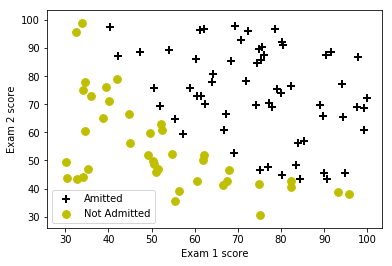

In [5]:
axes = plt.gca()
axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label='Amitted')
axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label='Not Admitted')
axes.set_xlabel('Exam 1 score')
axes.set_ylabel('Exam 2 score')
axes.legend(frameon= True, fancybox = True);
print(data[pos][:,0])

In [6]:
X = data[:, :2]
y = data[:, 2]
m = y.size
X = np.array(X)
y = np.array(y)


Logistic regression hypothesis
$$ h_{\theta}(x) = g(\theta^{T}x)$$
$$ g(z)=\frac{1}{1+e^{−z}} $$
Cost Function
$$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$
Vectorized Cost Function
$$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)$$

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
def cost_function(theta, X, y):
    h = sigmoid(np.matmul(X, theta))
#     print(h)
    J = (-1 / m) * (np.matmul(np.transpose(y), np.log(h)) + np.matmul(np.transpose(1 - y), np.log(1 - h)))
#     print(np.matmul(np.transpose(1 - y), np.log(1 - h)))
    return J

In [9]:
def gradient(theta, X, y):
#     print(X.shape,theta.shape)
#     print(X,theta,y)
    h = sigmoid(np.matmul(X, theta))
#     print(h.shape)
    error = h - y
    return (1 / m) * np.matmul(np.transpose(X), error)

In [10]:
print(X.shape)
X = np.concatenate((np.ones((m, 1)), X.reshape(m, 2)),axis=1)
print(X.shape,y.shape)
theta = np.zeros(X.shape[1])
print(theta.shape)

(100, 2)
(100, 3) (100,)
(3,)


#### intial cost and gradient

In [11]:
intial_theta = np.array([0, 0, 0])
cost_function(intial_theta, X, y)
gradient(intial_theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

#### Compute and display cost and gradient with non-zero theta

In [12]:
cost_function(X, y, np.array([-24, 0.2, 0.2]))
gradient(np.array([-24, 0.2, 0.2]), X, y)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


array([0.04290299, 2.56623412, 2.64679737])

#### optimising intial theta

In [13]:
from scipy.optimize import minimize

In [14]:
print(X.shape, y.shape)
res = minimize(cost_function, np.array([0, 0, 0]), args=(X,y), method=None, jac=gradient, options={'maxiter':400})
res

(100, 3) (100,)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


      fun: 0.20349770158944375
 hess_inv: array([[ 3.31474479e+03, -2.63892205e+01, -2.70237122e+01],
       [-2.63892205e+01,  2.23869433e-01,  2.02682332e-01],
       [-2.70237122e+01,  2.02682332e-01,  2.35335117e-01]])
      jac: array([-9.52476817e-09, -9.31921315e-07, -2.82608927e-07])
  message: 'Optimization terminated successfully.'
     nfev: 31
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([-25.16133284,   0.2062317 ,   0.2014716 ])

In [15]:
print('optimised theta : ', res.x, '\ncost at optmised theta : ', res.fun)

optimised theta :  [-25.16133284   0.2062317    0.2014716 ] 
cost at optmised theta :  0.20349770158944375


In [16]:
def predict(theta, X, threshold = 0.5):
    return (sigmoid(np.matmul(X, theta)) >= threshold).astype(int)

In [17]:
predict(res.x, np.array([1,45,85]))

1

### decision boundary

(2500, 3)


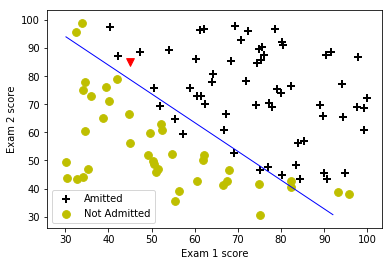

In [18]:
axes = plt.gca()
axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label='Amitted')
axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label='Not Admitted')
axes.set_xlabel('Exam 1 score')
axes.set_ylabel('Exam 2 score')
axes.legend(frameon= True, fancybox = True);

plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')

x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
# print(xx1.shape,xx2.shape)
# x1, x2 = np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)
# x1 = np.array(x1).reshape(x1.shape[0],1)
# x2 = np.array(x2).reshape(x1.shape[0],1)
# print(x1.shape)

# h = sigmoid(np.matmul(np.concatenate((np.ones((x1.shape[0], 1)), x1, x2), axis = 1), res.x))
# h.shape
# plt.contour(x1, x2, h)
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
print(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].shape)
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [.5], linewidths=1, colors='b');

## regularizes logistic regression


In [19]:
data = np.loadtxt('data/ex2data2.txt', delimiter=',')

In [20]:
X = data[:, :2]
y = data[:, 2]
m = y.size
X = np.array(X)
y = np.array(y)

[ 0.051267  -0.092742  -0.21371   -0.375     -0.51325   -0.52477
 -0.39804   -0.30588    0.016705   0.13191    0.38537    0.52938
  0.63882    0.73675    0.54666    0.322      0.16647   -0.046659
 -0.17339   -0.47869   -0.60541   -0.62846   -0.59389   -0.42108
 -0.11578    0.20104    0.46601    0.67339   -0.13882   -0.29435
 -0.26555   -0.16187   -0.17339   -0.28283   -0.36348   -0.30012
 -0.23675   -0.06394    0.062788   0.22984    0.2932     0.48329
  0.64459    0.46025    0.6273     0.57546    0.72523    0.22408
  0.44297    0.322      0.13767   -0.0063364 -0.092742  -0.20795
 -0.20795   -0.43836   -0.21947   -0.13882  ]


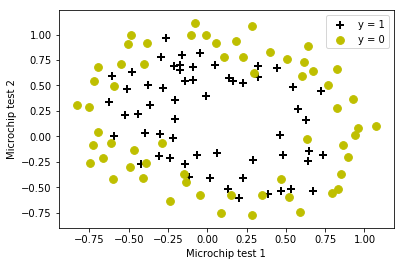

In [21]:
# boolean array indexing
neg = data[:, 2] == 0
pos = data[:, 2] == 1
axes = plt.gca()
axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label='y = 1')
axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label='y = 0')
axes.set_xlabel('Microchip test 1')
axes.set_ylabel('Microchip test 2')
axes.legend(frameon= True, fancybox = True);
print(data[pos][:,0])

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
poly = PolynomialFeatures(6) #Generate polynomial and interaction features. with degree 6\
XX = poly.fit(X).transform(X)  # or poly.fit_transform(X)
XX.shape

(118, 28)

Regularized Cost Function
$$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$
Vectorized Cost Function
$$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big) + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$

In [27]:
def cost_function_reg(theta, reg, *args):
    J = 0
    m = y.size
    h = sigmoid(np.matmul(XX, theta))
    J = (-1 / m) * (np.matmul(np.transpose(y), np.log(h)) + np.matmul(np.transpose(1 - y), np.log(1 - h))) + (reg / (2 * m)) * np.sum(np.square(theta[1:]))
#     J = np.asarray(J)* np.ones(1)
#     print(J)
#     if np.isnan(J):
#         return(np.inf)
#     return(J[0])
    return J

In [28]:
def gradient_reg(theta,reg,*args):
    h = sigmoid(np.matmul(XX, theta))
    error = h - y 
    grad = (1 / m) * np.matmul(np.transpose(XX), error) + (reg / m) * np.concatenate(([0], theta[1:]))
#     grad = grad.reshape(-1,1)
#     print (grad)
    return grad.flatten()

In [29]:
initial_theta = np.zeros(XX.shape[1])
cost_function_reg(initial_theta, 1, XX, y)

0.6931471805599453

In [30]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

0
0 0       fun: 0.2245687255541922
 hess_inv: array([[ 1.85875803e+04,  2.25325123e+04,  3.73325646e+04,
        -1.78859070e+05, -9.42280986e+04, -9.82211222e+04,
        -1.43951231e+05, -3.09628897e+05, -2.47622988e+05,
        -1.69417476e+05,  5.35740082e+05,  5.99080793e+05,
         8.60701696e+05,  4.18199769e+05,  2.21209897e+05,
         2.19432447e+05,  5.61361496e+05,  7.89044402e+05,
         8.62060716e+05,  5.03138183e+05,  2.16483724e+05,
        -5.18408085e+05, -9.01003712e+05, -1.59891567e+06,
        -1.55253675e+06, -1.40667888e+06, -6.49467610e+05,
        -2.29766478e+05],
       [ 2.25325123e+04,  3.71769185e+04,  3.53699598e+04,
        -2.21913003e+05, -1.11701048e+05, -1.23504126e+05,
        -2.44127959e+05, -3.66414246e+05, -2.82116025e+05,
        -1.41449001e+05,  7.01919157e+05,  7.40907940e+05,
         1.06075774e+06,  4.92530620e+05,  2.56819207e+05,
         3.79996354e+05,  7.76295860e+05,  1.00440343e+06,
         8.58808724e+05,  4.34486374e+05, 

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


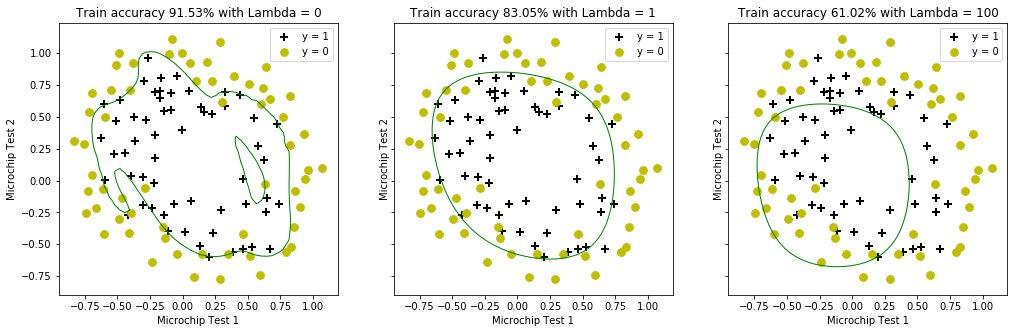

In [31]:
fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))

# Decision boundaries
# Lambda = 0 : No regularization --> too flexible, overfitting the training data
# Lambda = 1 : Looks about right
# Lambda = 100 : Too much regularization --> high bias

for i, C in enumerate([0,1,100]):
    # Optimize costFunctionReg
    print(C)
    res2 = minimize(cost_function_reg, initial_theta, args=(C, XX, y), method=None, jac=gradient_reg, options={'maxiter':3000})
    print(i,C,res2)
    # Accuracy
    accuracy = 100*sum(predict(res2.x, XX) == y.ravel())/y.size    

    # Scatter plot of X,y
    plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])
    # Scatter plot of X,y
#     plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])
    # Plot decisionboundary
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
    h = h.reshape(xx1.shape)
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
    axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))